In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('dfavgscores238.xlsx', index_col= 0)

In [3]:
df['avgscore_binned'] = pd.cut(df['avgscore'], bins=10)

In [4]:
# Create a contingency table
contingency_table = pd.crosstab(index = [df['ASBH02A'], df['Country']],columns=df['avgscore_binned'])

In [19]:
contingency_table

avgscore_binned      (83.869, 151.789]  (151.789, 219.036]  \
ASBH02A Country                                              
No      Austria                      0                   0   
        Egypt                        0                  18   
        France                       0                   0   
        Germany                      0                   0   
        Iran                         0                   1   
        Jordan                       3                  36   
        Netherlands                  0                   0   
        Sweden                       0                   0   
        Turkey                       0                   0   
Yes     Austria                      0                   0   
        Egypt                       50                 366   
        France                       0                   0   
        Germany                      0                   0   
        Iran                        21                  77   
        Jordan                      64                 407   
        Netherlands                  0                   0   
        Sweden                       0                   0   
        Turkey                       0                   5   

avgscore_binned      (219.036, 286.283]  (286.283, 353.53]  (353.53, 420.777]  \
ASBH02A Country                                                                 
No      Austria                       0                  4                 53   
        Egypt                        49                 55                 66   
        France                        1                 11                 31   
        Germany                       0                  6                 31   
        Iran                          5                 21                 26   
        Jordan                      122                223                240   
        Netherlands                   0                  0                  8   
        Sweden                        1                  8                 31   
        Turkey                        4                 30                 54   
Yes     Austria                       1                 18                170   
        Egypt                       968               1441               1670   
        France                        4                 35                246   
        Germany                       0                 12                 96   
        Iran                        379                816               1315   
        Jordan                      778                876               1061   
        Netherlands                   0                  4                 48   
        Sweden                        0                 11                 89   
        Turkey                       33                182                560   

avgscore_binned      (420.777, 488.024]  (488.024, 555.271]  \
ASBH02A Country                                               
No      Austria                     127                 172   
        Egypt                        60                  27   
        France                       63                  79   
        Germany                      52                  58   
        Iran                         41                  20   
        Jordan                      226                 102   
        Netherlands                  11                  29   
        Sweden                       80                  91   
        Turkey                       58                  51   
Yes     Austria                     713                1425   
        Egypt                      1490                 800   
        France                      978                1760   
        Germany                     325                 772   
        Iran                       1666                1131   
        Jordan                      907                 546   
        Netherlands                 274                 733   
    

In [20]:
contingency_table_reset

avgscore_binned,ASBH02A,Country,"(83.869, 151.789]","(151.789, 219.036]","(219.036, 286.283]","(286.283, 353.53]","(353.53, 420.777]","(420.777, 488.024]","(488.024, 555.271]","(555.271, 622.517]","(622.517, 689.764]","(689.764, 757.011]"
0,No,Austria,0,0,0,4,53,127,172,84,11,0
1,No,Egypt,0,18,49,55,66,60,27,8,0,0
2,No,France,0,0,1,11,31,63,79,48,9,0
3,No,Germany,0,0,0,6,31,52,58,44,7,0
4,No,Iran,0,1,5,21,26,41,20,6,0,0
5,No,Jordan,3,36,122,223,240,226,102,25,2,0
6,No,Netherlands,0,0,0,0,8,11,29,25,5,1
7,No,Sweden,0,0,1,8,31,80,91,65,29,3
8,No,Turkey,0,0,4,30,54,58,51,26,7,0
9,Yes,Austria,0,0,1,18,170,713,1425,1413,285,0


In [5]:
# Convert the contingency table to a format suitable for Plotly
contingency_table_reset = contingency_table.reset_index()
contingency_table_melted = contingency_table_reset.melt(id_vars=['ASBH02A','Country'], var_name='avgscore_binned', value_name='count')
# Convert Interval objects to strings
contingency_table_melted['avgscore_binned'] = contingency_table_melted['avgscore_binned'].astype(str)

In [6]:
contingency_table_melted

,ASBH02A,Country,avgscore_binned,count
0,No,Austria,"(83.869, 151.789]",0
1,No,Egypt,"(83.869, 151.789]",0
2,No,France,"(83.869, 151.789]",0
3,No,Germany,"(83.869, 151.789]",0
4,No,Iran,"(83.869, 151.789]",0
5,No,Jordan,"(83.869, 151.789]",3
6,No,Netherlands,"(83.869, 151.789]",0
7,No,Sweden,"(83.869, 151.789]",0
8,No,Turkey,"(83.869, 151.789]",0
9,Yes,Austria,"(83.869, 151.789]",0


In [7]:
# Convert avgscore_binned to categorical with the specified order
contingency_table_melted['avgscore_binned'] = pd.Categorical(contingency_table_melted['avgscore_binned'], 
                                       categories=[
                                           '(83.869, 151.789]', '(151.789, 219.036]', '(219.036, 286.283]', 
                                           '(286.283, 353.53]', '(353.53, 420.777]', '(420.777, 488.024]', 
                                           '(488.024, 555.271]', '(555.271, 622.517]', '(622.517, 689.764]', 
                                           '(689.764, 757.011]'], 
                                       ordered=True)

In [8]:
df_no = contingency_table_melted[contingency_table_melted['ASBH02A']=='No']
df_no= df_no.drop('ASBH02A', axis=1)
df_no

,Country,avgscore_binned,count
0,Austria,"(83.869, 151.789]",0
1,Egypt,"(83.869, 151.789]",0
2,France,"(83.869, 151.789]",0
3,Germany,"(83.869, 151.789]",0
4,Iran,"(83.869, 151.789]",0
5,Jordan,"(83.869, 151.789]",3
6,Netherlands,"(83.869, 151.789]",0
7,Sweden,"(83.869, 151.789]",0
8,Turkey,"(83.869, 151.789]",0
18,Austria,"(151.789, 219.036]",0


In [9]:
df_yes = contingency_table_melted[contingency_table_melted['ASBH02A'] == 'Yes']
df_yes= df_yes.drop('ASBH02A', axis=1)
df_yes

,Country,avgscore_binned,count
9,Austria,"(83.869, 151.789]",0
10,Egypt,"(83.869, 151.789]",50
11,France,"(83.869, 151.789]",0
12,Germany,"(83.869, 151.789]",0
13,Iran,"(83.869, 151.789]",21
14,Jordan,"(83.869, 151.789]",64
15,Netherlands,"(83.869, 151.789]",0
16,Sweden,"(83.869, 151.789]",0
17,Turkey,"(83.869, 151.789]",0
27,Austria,"(151.789, 219.036]",0


In [10]:
heatmap_no = df_no.pivot(index='Country',columns="avgscore_binned",values = "count")
heatmap_no

avgscore_binned,"(83.869, 151.789]","(151.789, 219.036]","(219.036, 286.283]","(286.283, 353.53]","(353.53, 420.777]","(420.777, 488.024]","(488.024, 555.271]","(555.271, 622.517]","(622.517, 689.764]","(689.764, 757.011]"
Country,,,,,,,,,,
Austria,0,0,0,4,53,127,172,84,11,0
Egypt,0,18,49,55,66,60,27,8,0,0
France,0,0,1,11,31,63,79,48,9,0
Germany,0,0,0,6,31,52,58,44,7,0
Iran,0,1,5,21,26,41,20,6,0,0
Jordan,3,36,122,223,240,226,102,25,2,0
Netherlands,0,0,0,0,8,11,29,25,5,1
Sweden,0,0,1,8,31,80,91,65,29,3
Turkey,0,0,4,30,54,58,51,26,7,0


In [11]:
heatmap_no["total"]= heatmap_no.sum(axis=1)

In [12]:
heatmap_no

avgscore_binned,"(83.869, 151.789]","(151.789, 219.036]","(219.036, 286.283]","(286.283, 353.53]","(353.53, 420.777]","(420.777, 488.024]","(488.024, 555.271]","(555.271, 622.517]","(622.517, 689.764]","(689.764, 757.011]",total
Country,,,,,,,,,,,
Austria,0,0,0,4,53,127,172,84,11,0,451
Egypt,0,18,49,55,66,60,27,8,0,0,283
France,0,0,1,11,31,63,79,48,9,0,242
Germany,0,0,0,6,31,52,58,44,7,0,198
Iran,0,1,5,21,26,41,20,6,0,0,120
Jordan,3,36,122,223,240,226,102,25,2,0,979
Netherlands,0,0,0,0,8,11,29,25,5,1,79
Sweden,0,0,1,8,31,80,91,65,29,3,308
Turkey,0,0,4,30,54,58,51,26,7,0,230


In [13]:
# Assuming your DataFrame is named df
# Copy the total column to a variable, we'll use it for division later
total_column = heatmap_no['total']

# Dividing all columns except the 'total' column by the 'total' column of that row
df_percentage = heatmap_no.div(total_column, axis=0) * 100

In [16]:
df_percentage = df_percentage.drop("total", axis = 1)
df_percentage

avgscore_binned,"(83.869, 151.789]","(151.789, 219.036]","(219.036, 286.283]","(286.283, 353.53]","(353.53, 420.777]","(420.777, 488.024]","(488.024, 555.271]","(555.271, 622.517]","(622.517, 689.764]","(689.764, 757.011]"
Country,,,,,,,,,,
Austria,0.000000,0.000000,0.000000,0.886918,11.751663,28.159645,38.137472,18.625277,2.439024,0.000000
Egypt,0.000000,6.360424,17.314488,19.434629,23.321555,21.201413,9.540636,2.826855,0.000000,0.000000
France,0.000000,0.000000,0.413223,4.545455,12.809917,26.033058,32.644628,19.834711,3.719008,0.000000
Germany,0.000000,0.000000,0.000000,3.030303,15.656566,26.262626,29.292929,22.222222,3.535354,0.000000
Iran,0.000000,0.833333,4.166667,17.500000,21.666667,34.166667,16.666667,5.000000,0.000000,0.000000
Jordan,0.306435,3.677222,12.461696,22.778345,24.514811,23.084780,10.418795,2.553626,0.204290,0.000000
Netherlands,0.000000,0.000000,0.000000,0.000000,10.126582,13.924051,36.708861,31.645570,6.329114,1.265823
Sweden,0.000000,0.000000,0.324675,2.597403,10.064935,25.974026,29.545455,21.103896,9.415584,0.974026
Turkey,0.000000,0.000000,1.739130,13.043478,23.478261,25.217391,22.173913,11.304348,3.043478,0.000000


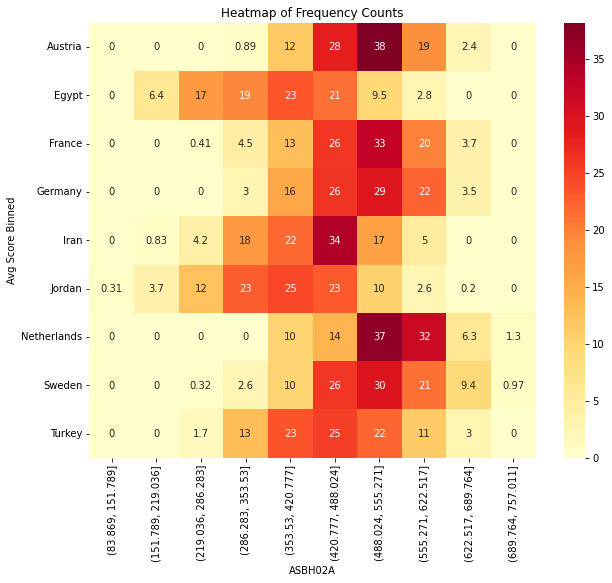

In [17]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_percentage, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()

In [21]:
# Convert the contingency table to a format suitable for Plotly
df_percentage_reset = df_percentage.reset_index()
df_percentage_melted = df_percentage_reset.melt(id_vars='Country', var_name='avgscore_binned', value_name='percentage')

In [22]:
df_percentage_melted

,Country,avgscore_binned,percentage
0,Austria,"(83.869, 151.789]",0.000000
1,Egypt,"(83.869, 151.789]",0.000000
2,France,"(83.869, 151.789]",0.000000
3,Germany,"(83.869, 151.789]",0.000000
4,Iran,"(83.869, 151.789]",0.000000
5,Jordan,"(83.869, 151.789]",0.306435
6,Netherlands,"(83.869, 151.789]",0.000000
7,Sweden,"(83.869, 151.789]",0.000000
8,Turkey,"(83.869, 151.789]",0.000000
9,Austria,"(151.789, 219.036]",0.000000


In [25]:
# Convert Interval objects to strings
df_percentage_melted['avgscore_binned'] = df_percentage_melted['avgscore_binned'].astype(str)

In [29]:
# Convert avgscore_binned to categorical with the specified order
df_percentage_melted['avgscore_binned'] = pd.Categorical(df_percentage_melted['avgscore_binned'], 
                                       categories=[
                                           '(83.869, 151.789]', '(151.789, 219.036]', '(219.036, 286.283]', 
                                           '(286.283, 353.53]', '(353.53, 420.777]', '(420.777, 488.024]', 
                                           '(488.024, 555.271]', '(555.271, 622.517]', '(622.517, 689.764]', 
                                           '(689.764, 757.011]'], 
                                       ordered=True)

In [30]:
heatmap_percent_no = df_percentage_melted.pivot(index = "avgscore_binned", columns = "Country", values = "percentage")

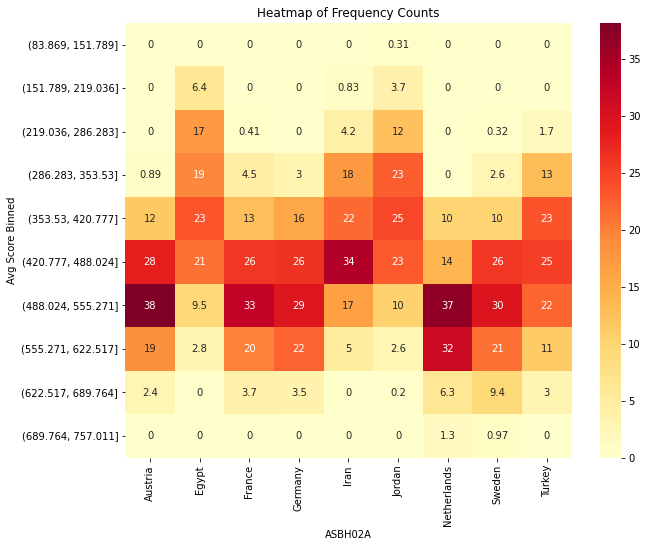

In [31]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_percent_no, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()

Now I need to do this again with the yesses and put them side by side.

In [32]:
heatmap_yes = df_yes.pivot(index='Country',columns="avgscore_binned",values = "count")
heatmap_yes["total"]= heatmap_yes.sum(axis=1)
# Assuming your DataFrame is named df
# Copy the total column to a variable, we'll use it for division later
total_column_yes = heatmap_yes['total']

# Dividing all columns except the 'total' column by the 'total' column of that row
df_percentage_yes = heatmap_yes.div(total_column_yes, axis=0) * 100
df_percentage_yes = df_percentage_yes.drop("total", axis = 1)
# Convert the contingency table to a format suitable for Plotly
df_percentage_yes_reset = df_percentage_yes.reset_index()
df_percentage__yes_melted = df_percentage_yes_reset.melt(id_vars='Country', var_name='avgscore_binned', value_name='percentage')

In [33]:
# Convert Interval objects to strings
df_percentage__yes_melted['avgscore_binned'] = df_percentage__yes_melted['avgscore_binned'].astype(str)

In [34]:
# Convert avgscore_binned to categorical with the specified order
df_percentage__yes_melted['avgscore_binned'] = pd.Categorical(df_percentage__yes_melted['avgscore_binned'], 
                                       categories=[
                                           '(83.869, 151.789]', '(151.789, 219.036]', '(219.036, 286.283]', 
                                           '(286.283, 353.53]', '(353.53, 420.777]', '(420.777, 488.024]', 
                                           '(488.024, 555.271]', '(555.271, 622.517]', '(622.517, 689.764]', 
                                           '(689.764, 757.011]'], 
                                       ordered=True)

In [35]:
heatmap_percent_yes = df_percentage__yes_melted.pivot(index = "avgscore_binned", columns = "Country", values = "percentage")

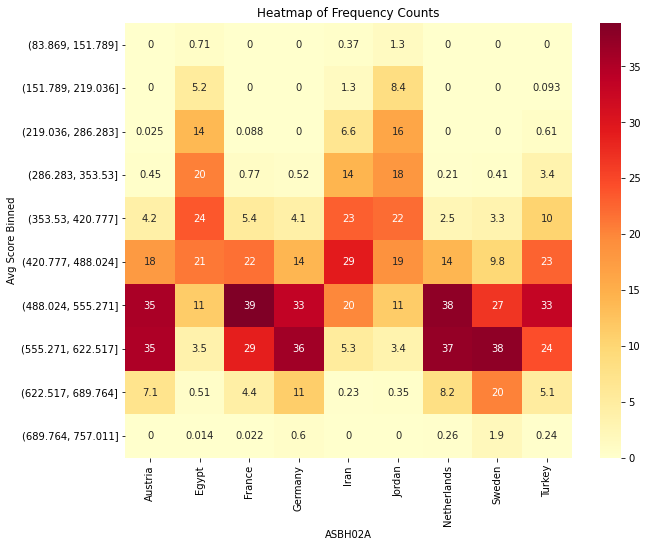

In [36]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_percent_yes, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()

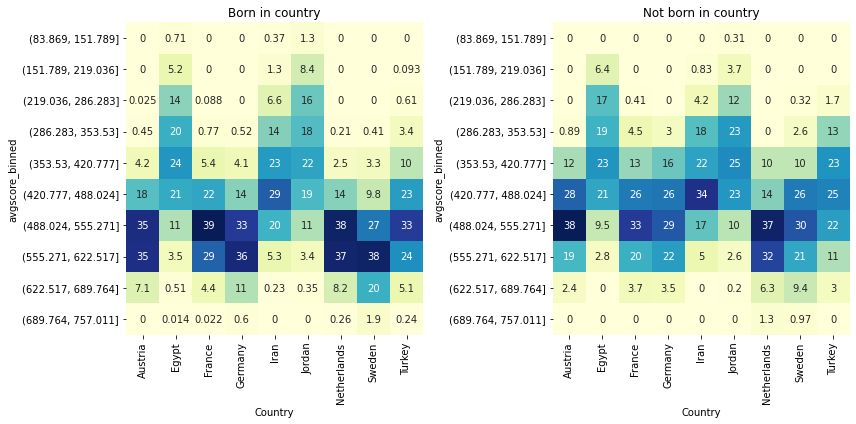

In [41]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_percent_yes, ax=axes[0], cmap="YlGnBu", annot=True, cbar=False)
sns.heatmap(heatmap_percent_no, ax=axes[1], cmap="YlGnBu", annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

I would expect those born in the country to have darker squares lower down.

<AxesSubplot:xlabel='Country', ylabel='avgscore_binned'>

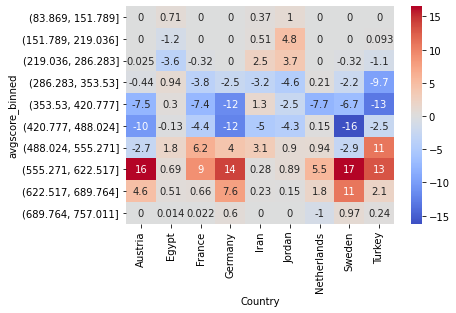

In [40]:
diff_data = heatmap_percent_yes - heatmap_percent_no

# Plot the difference heatmap
sns.heatmap(diff_data, cmap="coolwarm", annot = True, center=0)

I don't find the above very helpful. Actually with annotation it is rather helpful. 

Can also now split the dataframes into countries and plot the countries side by side.